In [50]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm

In [61]:
! pip install arabic_reshaper
! pip install python-bidi

     ------------------------------------ 156.5/156.5 kB 624.8 kB/s eta 0:00:00


In [62]:
import arabic_reshaper
from bidi.algorithm import get_display

In [81]:
survey = pd.read_excel("survey.xlsx")
survey

,Timestamp,هل أنت أو أي من أفراد أسرتك مصابين بمرض السكري؟,هل استخدمت أو تستخدم تطبيقات على هاتفك لمتابعة حالتك الصحية؟,هل تعاني من صعوبة في التحكم في مستوى السكر في الدم؟,هل تشعر بالحاجة إلى مساعدة إضافية لإدارة سكر الدم؟,هل تستخدم تطبيقًا أو موقعًا يقدم لك نصائح يومية حول إدارة سكر الدم؟\n,هل تجد صعوبة في تذكر مواعيد تناول الأدوية؟,هل تفضل أن يكون لديك مكان واحد يجمع جميع معلوماتك الصحية؟,هل تشعر بالراحة عند مشاركة معلوماتك الصحية مع مقدمي الرعاية الصحية من خلال تطبيق؟,كمريض بالسكري أو كراعٍ لمريض بالسكري او لتجنب الاصابة بالسكري. ما هي المساعدات التي تعتقد أننا يجب أن نوفرها لك أو لأي شخص مصاب بالسكري؟
0,2024-08-25 10:34:30.555,لا,لا,نعم,نعم,نعم,لا,نعم,لا,NaN
1,2024-08-25 12:26:32.741,لا,لا,نعم,نعم,نعم,لا,نعم,نعم,NaN
2,2024-08-25 12:37:17.393,لا,لا,لا,لا,نعم,لا,نعم,نعم,NaN
3,2024-08-25 13:15:47.202,لا,لا,لا,لا,نعم,نعم,نعم,نعم,NaN
4,2024-08-25 13:25:49.753,لا,لا,لا,لا,نعم,نعم,نعم,نعم,NaN
...,...,...,...,...,...,...,...,...,...,...
200,2024-08-28 22:45:02.557,لا,لا,لا,لا,لا,لا,لا,نعم,dont eat un night fool
201,2024-08-30 14:00:19.781,نعم,لا,لا,لا,لا,لا,نعم,لا,NaN
202,2024-08-30 19:51:55.769,نعم,لا,نعم,نعم,لا,نعم,نعم,نعم,Digitalization
203,2024-09-04 17:52:25.378,نعم,لا,نعم,نعم,لا,نعم,نعم,نعم,متابعه بعنايه مريض السكر وتجميع جميع بياناته ع...


In [52]:
survey.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype         
---  ------                                                                                                                                    --------------  -----         
 0   Timestamp                                                                                                                                 205 non-null    datetime64[ns]
 1   هل أنت أو أي من أفراد أسرتك مصابين بمرض السكري؟                                                                                           205 non-null    object        
 2   هل استخدمت أو تستخدم تطبيقات على هاتفك لمتابعة حالتك الصحية؟                                                                              205 non-null    object        
 3   هل تعاني من صعوبة في

In [53]:
survey["كمريض بالسكري أو كراعٍ لمريض بالسكري او لتجنب الاصابة بالسكري. ما هي المساعدات التي تعتقد أننا يجب أن نوفرها لك أو لأي شخص مصاب بالسكري؟"].isnull().sum()


102

In [54]:
survey["كمريض بالسكري أو كراعٍ لمريض بالسكري او لتجنب الاصابة بالسكري. ما هي المساعدات التي تعتقد أننا يجب أن نوفرها لك أو لأي شخص مصاب بالسكري؟"].fillna('غير متوفر', inplace=True) 


In [55]:
survey.isnull().sum()

Timestamp                                                                                                                                   0
هل أنت أو أي من أفراد أسرتك مصابين بمرض السكري؟                                                                                             0
هل استخدمت أو تستخدم تطبيقات على هاتفك لمتابعة حالتك الصحية؟                                                                                0
هل تعاني من صعوبة في التحكم في مستوى السكر في الدم؟                                                                                         0
هل  تشعر بالحاجة إلى مساعدة إضافية لإدارة سكر الدم؟                                                                                         0
هل تستخدم  تطبيقًا أو موقعًا يقدم لك نصائح يومية حول إدارة سكر الدم؟\n                                                                      0
هل تجد صعوبة في تذكر مواعيد تناول الأدوية؟                                                                                                  0
هل تفض

In [56]:
survey["كمريض بالسكري أو كراعٍ لمريض بالسكري او لتجنب الاصابة بالسكري. ما هي المساعدات التي تعتقد أننا يجب أن نوفرها لك أو لأي شخص مصاب بالسكري؟"].isnull().sum()


0

In [88]:
print (survey.columns)

Index(['Timestamp', 'هل أنت أو أي من أفراد أسرتك مصابين بمرض السكري؟',
       'هل استخدمت أو تستخدم تطبيقات على هاتفك لمتابعة حالتك الصحية؟',
       'هل تعاني من صعوبة في التحكم في مستوى السكر في الدم؟',
       'هل  تشعر بالحاجة إلى مساعدة إضافية لإدارة سكر الدم؟ ',
       'هل تستخدم  تطبيقًا أو موقعًا يقدم لك نصائح يومية حول إدارة سكر الدم؟\n',
       'هل تجد صعوبة في تذكر مواعيد تناول الأدوية؟',
       'هل تفضل أن يكون لديك مكان واحد يجمع جميع معلوماتك الصحية؟ ',
       'هل تشعر بالراحة عند مشاركة معلوماتك الصحية مع مقدمي الرعاية الصحية من خلال تطبيق؟',
       'كمريض بالسكري أو كراعٍ لمريض بالسكري او لتجنب الاصابة بالسكري. ما هي المساعدات التي تعتقد أننا يجب أن نوفرها لك أو لأي شخص مصاب بالسكري؟',
       'Reshaped_Survey'],
      dtype='object')


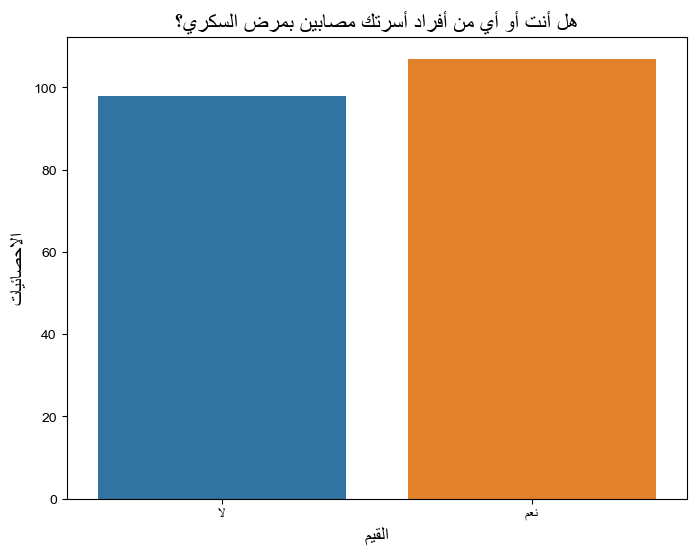

In [77]:
# Select the relevant column (replace with the actual column name)
survey_column = survey["هل أنت أو أي من أفراد أسرتك مصابين بمرض السكري؟"]  # Replace with your actual column name

# Reshape the Arabic text for correct display
survey['Reshaped_Survey'] = [get_display(arabic_reshaper.reshape(cat)) for cat in survey_column]

# Create a count plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Reshaped_Survey', data=survey)  # You can customize the palette

# Customize the x and y labels and title
plt.xlabel(get_display(arabic_reshaper.reshape('القيم')), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape('الاحصائيات')), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape('هل أنت أو أي من أفراد أسرتك مصابين بمرض السكري؟')), fontsize=16)

# Display the chart
plt.show()


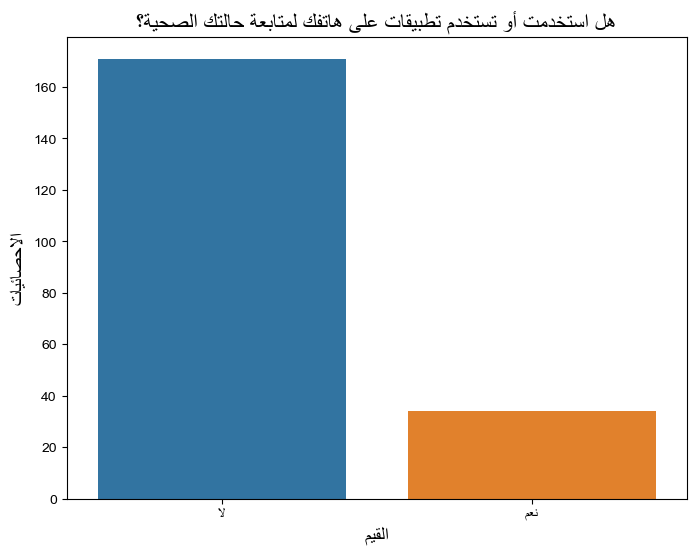

In [94]:
# Select the relevant column (replace with the actual column name)
survey_column = survey['هل استخدمت أو تستخدم تطبيقات على هاتفك لمتابعة حالتك الصحية؟']  # Replace with your actual column name

# Reshape the Arabic text for correct display
survey['Reshaped_Survey'] = [get_display(arabic_reshaper.reshape(cat)) for cat in survey_column]

# Create a count plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Reshaped_Survey', data=survey)  # You can customize the palette

# Customize the x and y labels and title
plt.xlabel(get_display(arabic_reshaper.reshape('القيم')), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape('الاحصائيات')), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape('هل استخدمت أو تستخدم تطبيقات على هاتفك لمتابعة حالتك الصحية؟')), fontsize=16)

# Display the chart
plt.show()


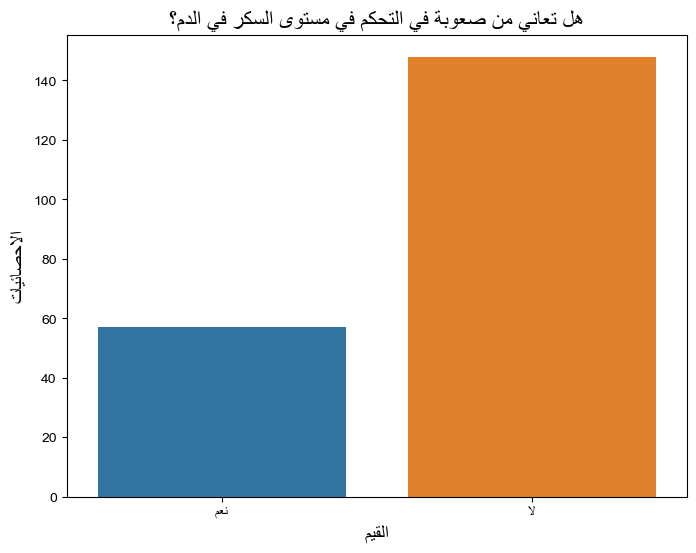

In [95]:
# Select the relevant column (replace with the actual column name)
survey_column = survey["هل تعاني من صعوبة في التحكم في مستوى السكر في الدم؟"]  # Replace with your actual column name

# Reshape the Arabic text for correct display
survey['Reshaped_Survey'] = [get_display(arabic_reshaper.reshape(cat)) for cat in survey_column]

# Create a count plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Reshaped_Survey', data=survey)  # You can customize the palette

# Customize the x and y labels and title
plt.xlabel(get_display(arabic_reshaper.reshape('القيم')), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape('الاحصائيات')), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape('هل تعاني من صعوبة في التحكم في مستوى السكر في الدم؟')), fontsize=16)

# Display the chart
plt.show()


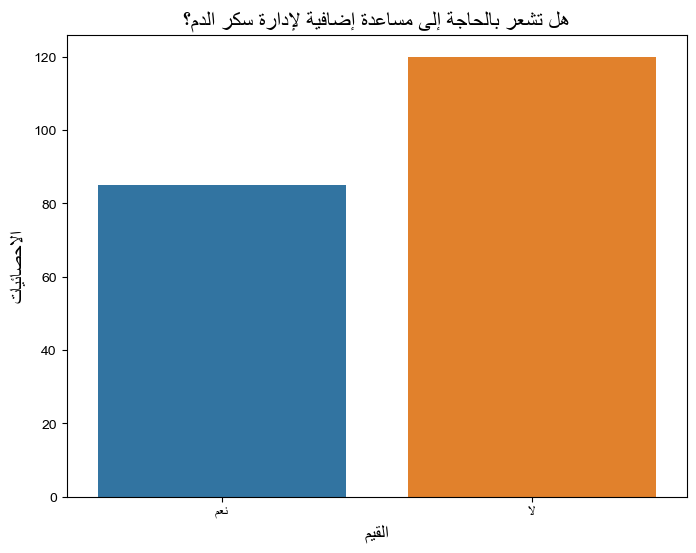

In [96]:
# Select the relevant column (replace with the actual column name)
survey_column = survey['هل  تشعر بالحاجة إلى مساعدة إضافية لإدارة سكر الدم؟ ']  # Replace with your actual column name

# Reshape the Arabic text for correct display
survey['Reshaped_Survey'] = [get_display(arabic_reshaper.reshape(cat)) for cat in survey_column]

# Create a count plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Reshaped_Survey', data=survey)  # You can customize the palette

# Customize the x and y labels and title
plt.xlabel(get_display(arabic_reshaper.reshape('القيم')), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape('الاحصائيات')), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape('هل تشعر بالحاجة إلى مساعدة إضافية لإدارة سكر الدم؟')), fontsize=16)

# Display the chart
plt.show()


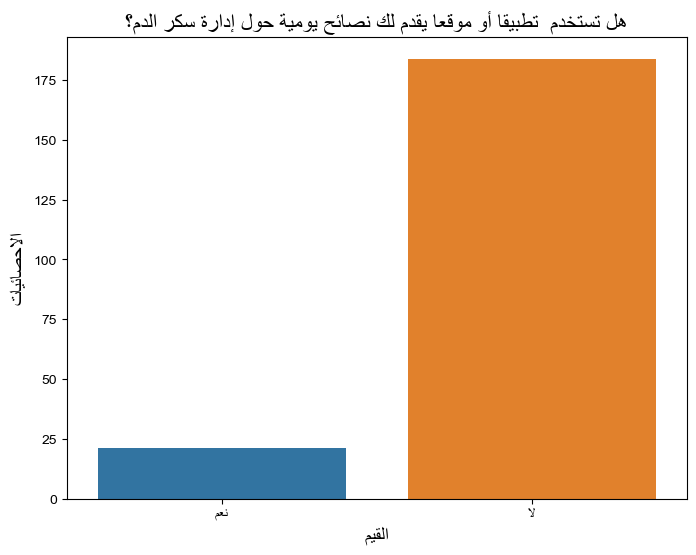

In [97]:
# Select the relevant column (replace with the actual column name)
survey_column = survey['هل تستخدم  تطبيقًا أو موقعًا يقدم لك نصائح يومية حول إدارة سكر الدم؟\n']  # Replace with your actual column name

# Reshape the Arabic text for correct display
survey['Reshaped_Survey'] = [get_display(arabic_reshaper.reshape(cat)) for cat in survey_column]

# Create a count plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Reshaped_Survey', data=survey)  # You can customize the palette

# Customize the x and y labels and title
plt.xlabel(get_display(arabic_reshaper.reshape('القيم')), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape('الاحصائيات')), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape('هل تستخدم  تطبيقًا أو موقعًا يقدم لك نصائح يومية حول إدارة سكر الدم؟')), fontsize=16)

# Display the chart
plt.show()


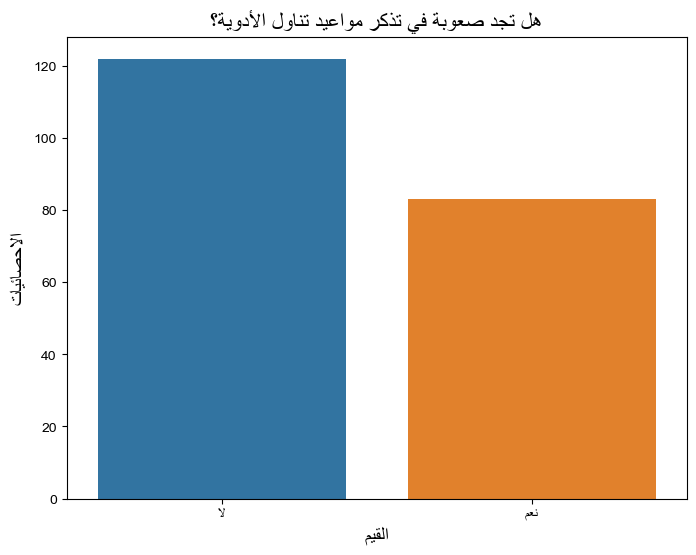

In [98]:
# Select the relevant column (replace with the actual column name)
survey_column = survey['هل تجد صعوبة في تذكر مواعيد تناول الأدوية؟']  # Replace with your actual column name

# Reshape the Arabic text for correct display
survey['Reshaped_Survey'] = [get_display(arabic_reshaper.reshape(cat)) for cat in survey_column]

# Create a count plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Reshaped_Survey', data=survey)  # You can customize the palette

# Customize the x and y labels and title
plt.xlabel(get_display(arabic_reshaper.reshape('القيم')), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape('الاحصائيات')), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape('هل تجد صعوبة في تذكر مواعيد تناول الأدوية؟')), fontsize=16)

# Display the chart
plt.show()


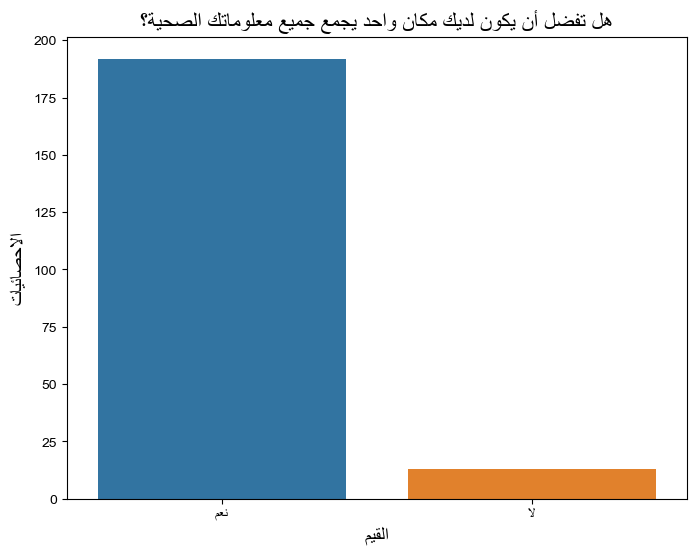

In [99]:
# Select the relevant column (replace with the actual column name)
survey_column = survey['هل تفضل أن يكون لديك مكان واحد يجمع جميع معلوماتك الصحية؟ ']  # Replace with your actual column name

# Reshape the Arabic text for correct display
survey['Reshaped_Survey'] = [get_display(arabic_reshaper.reshape(cat)) for cat in survey_column]

# Create a count plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Reshaped_Survey', data=survey)  # You can customize the palette

# Customize the x and y labels and title
plt.xlabel(get_display(arabic_reshaper.reshape('القيم')), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape('الاحصائيات')), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape('هل تفضل أن يكون لديك مكان واحد يجمع جميع معلوماتك الصحية؟')), fontsize=16)

# Display the chart
plt.show()


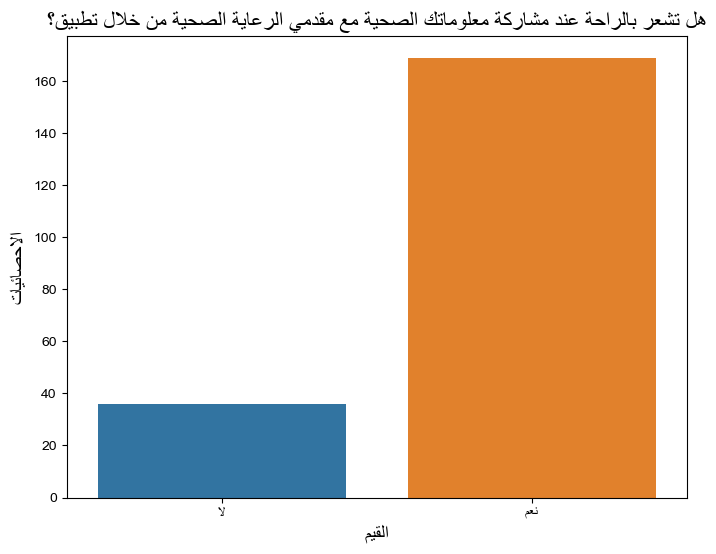

In [100]:
# Select the relevant column (replace with the actual column name)
survey_column = survey['هل تشعر بالراحة عند مشاركة معلوماتك الصحية مع مقدمي الرعاية الصحية من خلال تطبيق؟']  # Replace with your actual column name

# Reshape the Arabic text for correct display
survey['Reshaped_Survey'] = [get_display(arabic_reshaper.reshape(cat)) for cat in survey_column]

# Create a count plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Reshaped_Survey', data=survey)  # You can customize the palette

# Customize the x and y labels and title
plt.xlabel(get_display(arabic_reshaper.reshape('القيم')), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape('الاحصائيات')), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape('هل تشعر بالراحة عند مشاركة معلوماتك الصحية مع مقدمي الرعاية الصحية من خلال تطبيق؟')), fontsize=16)

# Display the chart
plt.show()


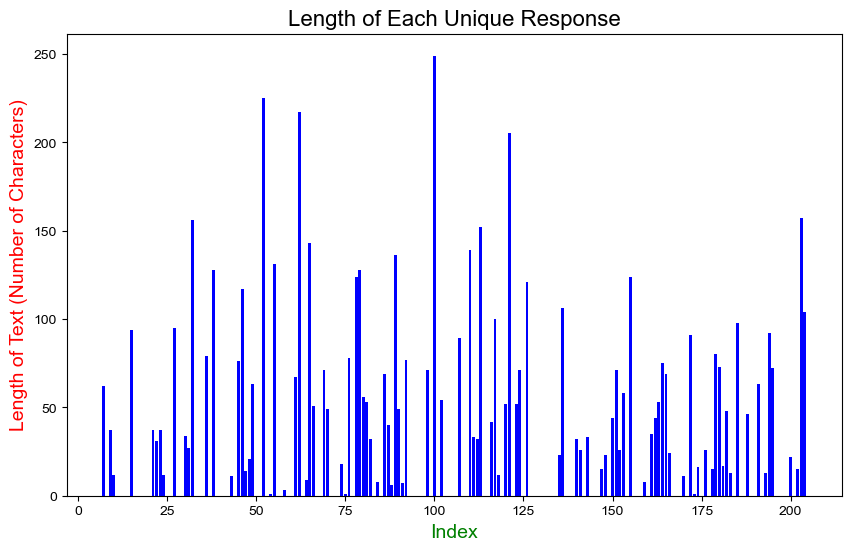

In [111]:
import matplotlib.pyplot as plt

# Select the relevant column
survey_columns = survey['كمريض بالسكري أو كراعٍ لمريض بالسكري او لتجنب الاصابة بالسكري. ما هي المساعدات التي تعتقد أننا يجب أن نوفرها لك أو لأي شخص مصاب بالسكري؟']  # Replace with your actual column name
# Calculate the length of each text response
text_lengths = survey_columns.str.len()

# Create a bar chart for the text lengths
plt.figure(figsize=(10, 6))
plt.bar(range(len(text_lengths)), text_lengths, color='blue')

# Add labels and title
plt.xlabel('Index', color='green', fontsize=14)
plt.ylabel('Length of Text (Number of Characters)', color='red', fontsize=14)
plt.title('Length of Each Unique Response', fontsize=16)

# Display the chart
plt.show()


C:\Users\zahra\AppData\Local\Temp\ipykernel_6312\4274342028.py:26: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\zahra\AppData\Local\Temp\ipykernel_6312\4274342028.py:26: UserWarning: Glyph 9757 (\N{WHITE UP POINTING INDEX}) missing from current font.
  plt.tight_layout()


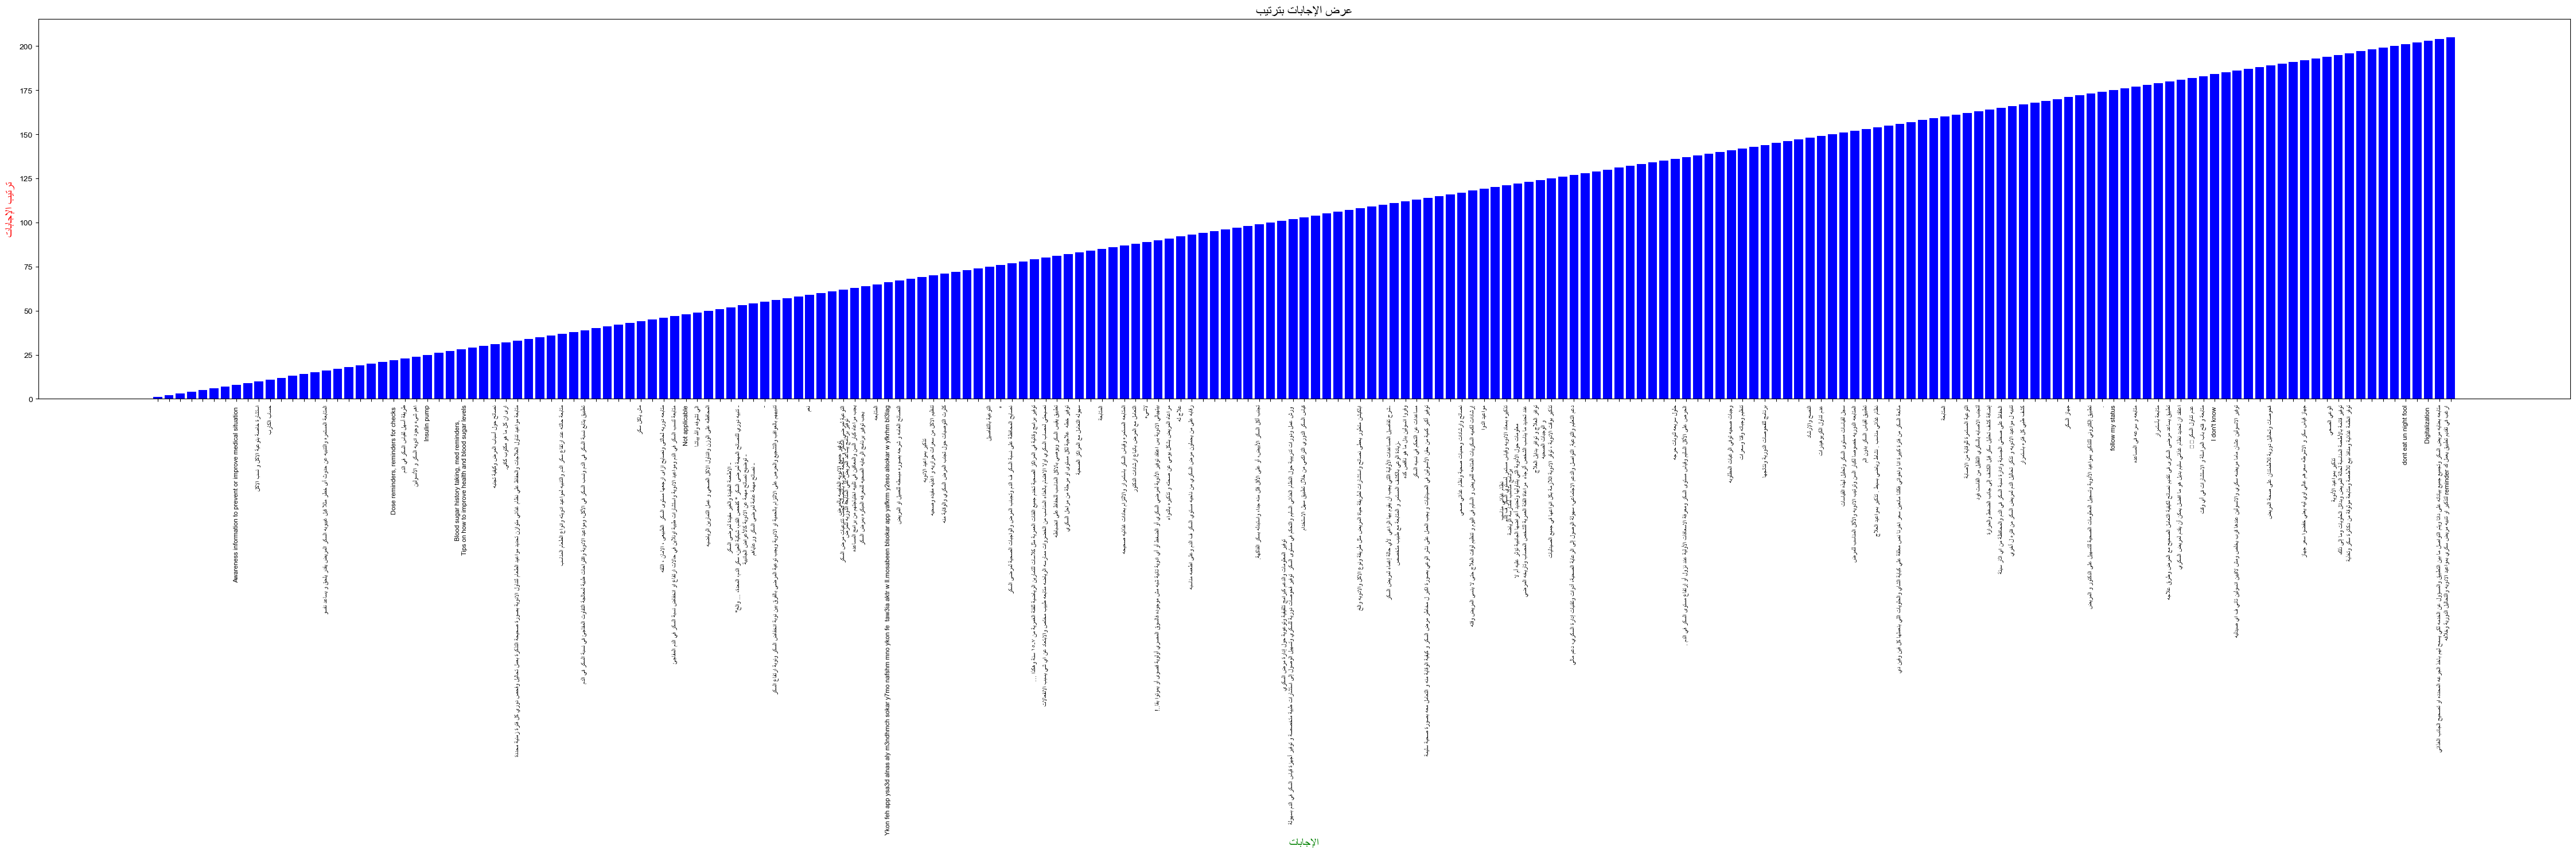

In [118]:

# Select the relevant column
survey_column = survey['كمريض بالسكري أو كراعٍ لمريض بالسكري او لتجنب الاصابة بالسكري. ما هي المساعدات التي تعتقد أننا يجب أن نوفرها لك أو لأي شخص مصاب بالسكري؟']  # Replace with your actual column name

# Handle missing or non-string values by converting them to strings
survey_column = survey_column.fillna("").astype(str)

# Reshape and fix the direction of Arabic text for visualization
reshaped_survey_column = [get_display(arabic_reshaper.reshape(cat)) for cat in survey_column]

# Create an index for each unique response
index_values = range(1, len(reshaped_survey_column) + 1)

# Create a bar chart with responses as labels on the x-axis and index on the y-axis
plt.figure(figsize=(45, 15))
plt.bar(index_values, index_values, color='blue')  # Using index on both x and y for simplicity

# Set custom x-ticks with the reshaped Arabic answers
plt.xticks(index_values, reshaped_survey_column, rotation=90, fontsize=8)  # Rotate for readability

# Add labels and title
plt.xlabel(get_display(arabic_reshaper.reshape('الإجابات')), color='green', fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape('ترتيب الإجابات')), color='red', fontsize=14)
plt.title(get_display(arabic_reshaper.reshape('عرض الإجابات بترتيب')), fontsize=16)

# Display the chart
plt.tight_layout()
plt.show()


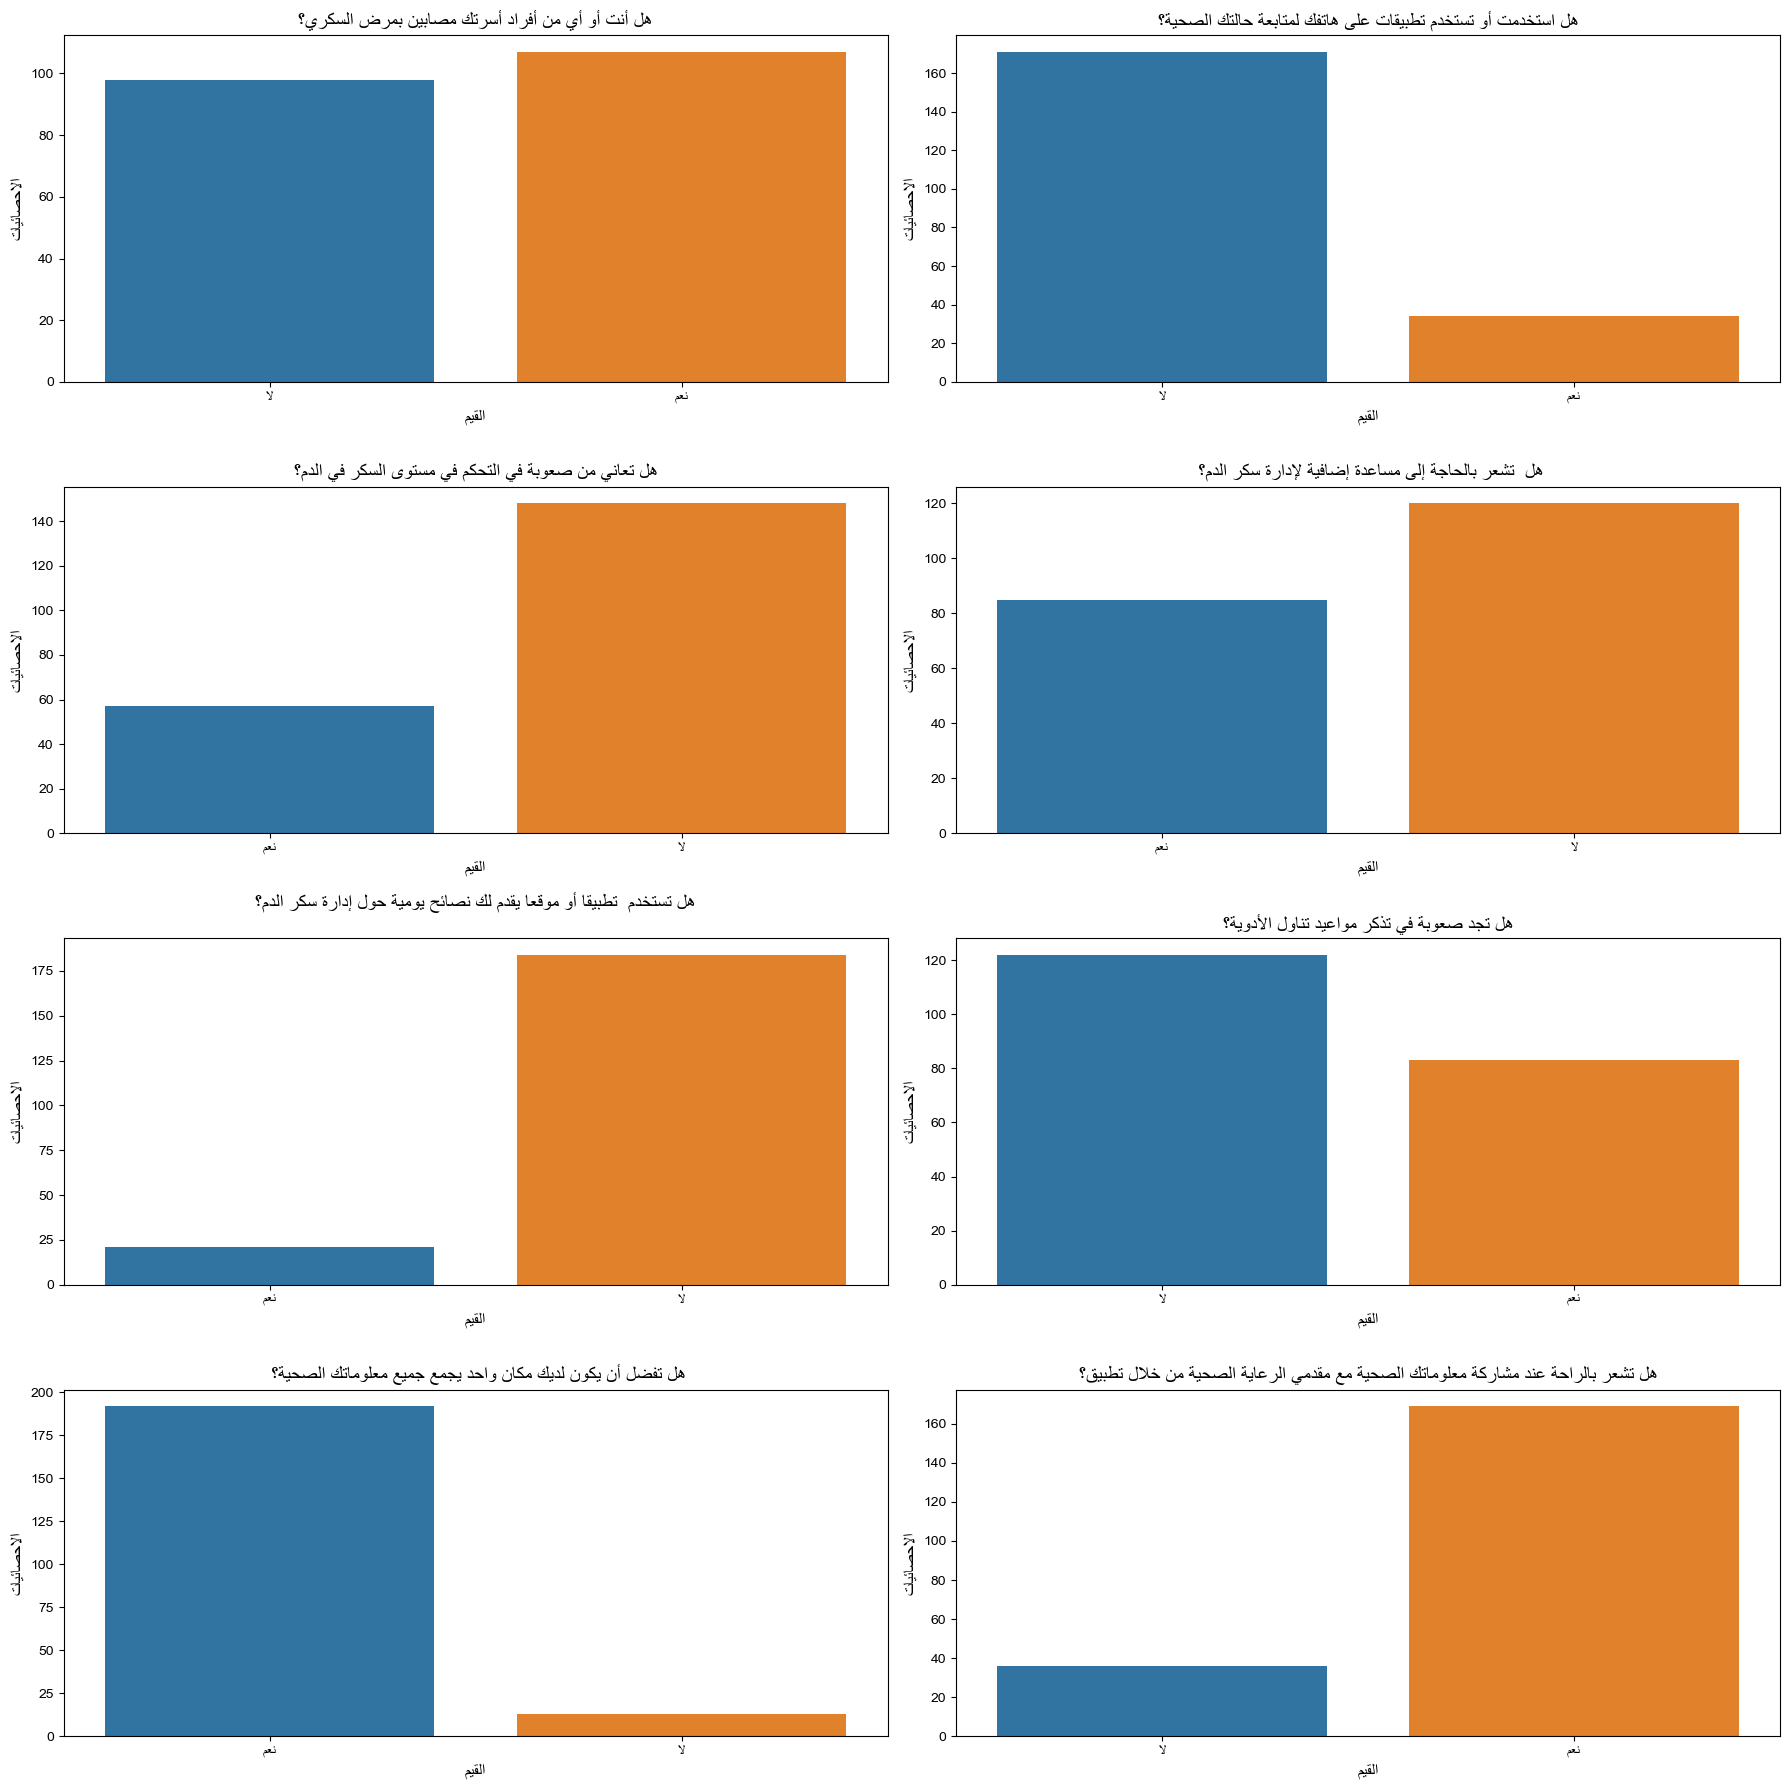

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Assuming the survey data is already loaded into the `survey` DataFrame
# List of column names to visualize
columns_to_plot = [
       'هل أنت أو أي من أفراد أسرتك مصابين بمرض السكري؟',
       'هل استخدمت أو تستخدم تطبيقات على هاتفك لمتابعة حالتك الصحية؟',
       'هل تعاني من صعوبة في التحكم في مستوى السكر في الدم؟',
       'هل  تشعر بالحاجة إلى مساعدة إضافية لإدارة سكر الدم؟ ',
       'هل تستخدم  تطبيقًا أو موقعًا يقدم لك نصائح يومية حول إدارة سكر الدم؟\n',
       'هل تجد صعوبة في تذكر مواعيد تناول الأدوية؟',
       'هل تفضل أن يكون لديك مكان واحد يجمع جميع معلوماتك الصحية؟ ',
       'هل تشعر بالراحة عند مشاركة معلوماتك الصحية مع مقدمي الرعاية الصحية من خلال تطبيق؟',
]

# Create a figure with subplots (4 rows x 2 columns for 8 count plots)
fig, axes = plt.subplots(4, 2, figsize=(18, 18))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop over each column and create a count plot
for i, column in enumerate(columns_to_plot):
    # Select the relevant column
    survey_column = survey[column]

    # Reshape the Arabic text for correct display
    survey['Reshaped_Survey'] = [get_display(arabic_reshaper.reshape(cat)) for cat in survey_column]

    # Create a count plot using seaborn in the respective subplot
    sns.countplot(x='Reshaped_Survey', data=survey, ax=axes[i])

    # Customize the x and y labels and title for each subplot
    axes[i].set_xlabel(get_display(arabic_reshaper.reshape('القيم')), fontsize=12)
    axes[i].set_ylabel(get_display(arabic_reshaper.reshape('الاحصائيات')), fontsize=12)
    axes[i].set_title(get_display(arabic_reshaper.reshape(column)), fontsize=14)

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Display the combined figure with all 8 plots
plt.show()
